### Assignment 2: Recognition using histograms, convolution, and image filtering

In [5]:
import a2_utils
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [37]:
#1-d convolution, with replicating edges
def simple_convolution(signal, kernel):
    #extend the signal, by replicating edges with half of the length of the kernel
    N = int(np.floor(len(kernel)/2))
    signal_tmp = np.zeros(len(signal) + 2 *N)
    signal_tmp[N:len(signal)+N] = signal
    signal_tmp[:N] = signal[0]
    signal_tmp[len(signal)+N:] = signal[len(signal)-1]
    signal = signal_tmp

    filtered_signal = np.zeros(len(signal))
    end = len(signal) - N -1
    for i in range(N, end):
        filtered_signal[i] = sum([kernel[j] * signal[i-j] for j in range(0, len(kernel))])

    filtered_signal = filtered_signal[2*N:]

    return filtered_signal 


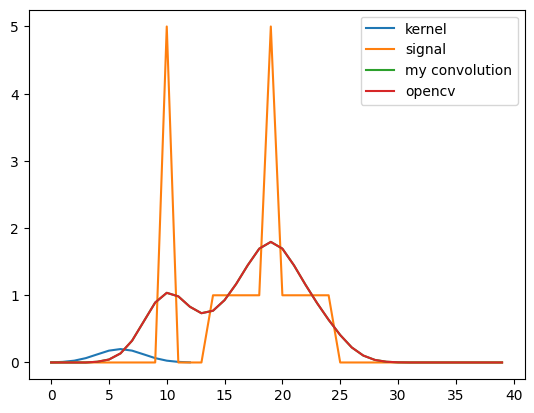

In [38]:
signal= a2_utils.read_data("signal.txt")
kernel = a2_utils.read_data("kernel.txt")
plt.plot(kernel, label = "kernel")
plt.plot(signal,label= "signal")
plt.plot(simple_convolution(signal, kernel),label= "my convolution") 
plt.plot(cv2.filter2D(signal,-1, kernel), label = "opencv")
plt.legend()


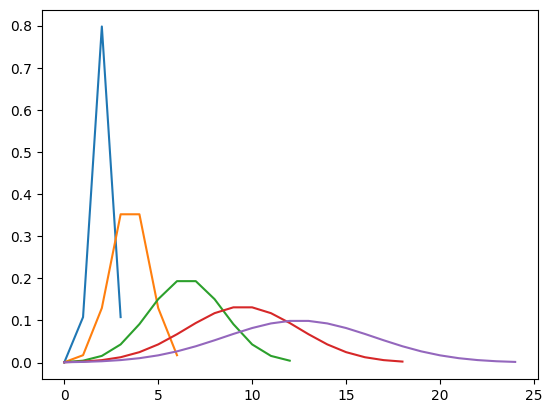

In [49]:
#gaussian kernel 
def gauss(sigma):
    size = int(2*3*sigma +1)
    kernel = np.zeros(size)
    for i in range(size):
        x = i - size/2
        kernel[i] = 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 /(2*sigma**2))
    return kernel

for sigma in [0.5,1,2,3,4]:
    kernel = gauss(sigma)
    plt.plot(kernel)